/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_65154/193797576.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  starburst_data = pd.read_csv('SB99.dat', delim_whitespace=True, header=None)


   ID  ID_MASK  H_BETA_FLUX  H_BETA_FLUX_ERR  OIII_5007_FLUX  \
0   1      1.0    88.649703         2.494409      491.180987   
1   3      3.0    17.124042         0.715287       85.307068   
2   7     11.0    13.285319         0.569428       39.242761   
3   9     13.0    31.443495         0.851705      136.057021   
4  11     15.0    47.815526         1.320968      126.005902   
5  17     21.0    11.200002         0.338545       29.903199   
6  19     23.0     7.826941         0.425261       33.937198   
7  21     25.0     9.668545         0.342895       16.502650   

   OIII_5007_FLUX_ERR  H_ALPHA_FLUX  H_ALPHA_FLUX_ERR  NII_6584_FLUX  \
0           18.179230    280.129860          2.023057       7.743517   
1            4.093336     49.981168          0.499074       1.743826   
2            1.641625     41.935169          0.387233       2.737472   
3            4.998214     90.248278          1.855688       3.666542   
4            3.462590    154.922381          3.912832       8.3

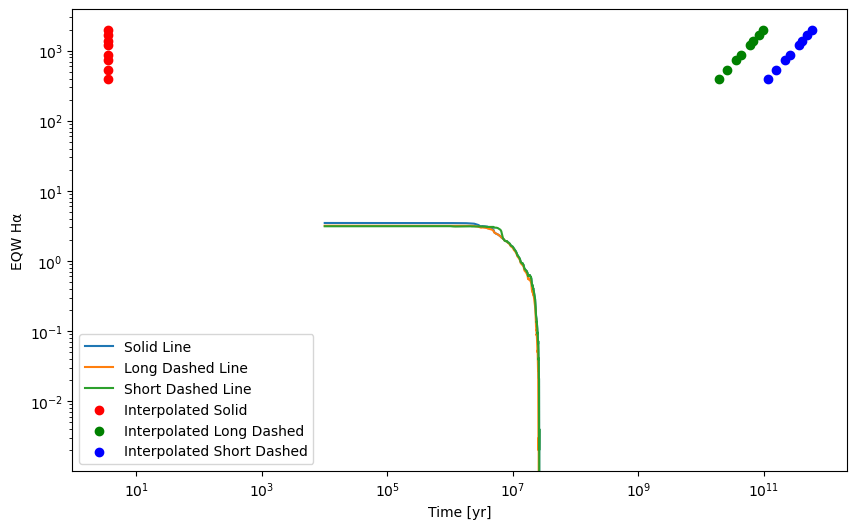

In [7]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Paso 1: Cargar los datos de StarBurst99 sin nombres de columnas
starburst_data = pd.read_csv('SB99.dat', delim_whitespace=True, header=None)

# Asignar nombres a las columnas
starburst_data.columns = ['Time', 'Solid', 'LongDashed', 'ShortDashed']

# Paso 2: Crear funciones de interpolación
interpolate_solid = interp1d(starburst_data['Time'], starburst_data['Solid'], kind='linear', fill_value='extrapolate')
interpolate_longdashed = interp1d(starburst_data['LongDashed'], starburst_data['Time'], kind='linear', fill_value='extrapolate')
interpolate_shortdashed = interp1d(starburst_data['ShortDashed'], starburst_data['Time'], kind='linear', fill_value='extrapolate')

# Paso 3: Cargar tus datos de EQW de Hα
eqw_data = pd.read_csv('measurement_emission_lines.tsv', delimiter='\t')
eqw_data = eqw_data.drop(index=[8,9,10,11,12])

# Paso 4: Aplicar la interpolación para obtener las edades
eqw_data['Age_Solid'] = interpolate_solid(eqw_data['H_ALPHA_EQW'])
eqw_data['Age_LongDashed'] = interpolate_longdashed(eqw_data['H_ALPHA_EQW'])
eqw_data['Age_ShortDashed'] = interpolate_shortdashed(eqw_data['H_ALPHA_EQW'])

# Mostrar los resultados
print(eqw_data)

# Opcional: Graficar los datos
plt.figure(figsize=(10, 6))
plt.plot(starburst_data['Time'], starburst_data['Solid'], label='Solid Line')
plt.plot(starburst_data['Time'], starburst_data['LongDashed'], label='Long Dashed Line')
plt.plot(starburst_data['Time'], starburst_data['ShortDashed'], label='Short Dashed Line')
plt.scatter(eqw_data['Age_Solid'], eqw_data['H_ALPHA_EQW'], color='red', label='Interpolated Solid')
plt.scatter(eqw_data['Age_LongDashed'], eqw_data['H_ALPHA_EQW'], color='green', label='Interpolated Long Dashed')
plt.scatter(eqw_data['Age_ShortDashed'], eqw_data['H_ALPHA_EQW'], color='blue', label='Interpolated Short Dashed')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time [yr]')
plt.ylabel('EQW Hα')
plt.legend()
plt.show()


/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_65154/1809813177.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  starburst_data = pd.read_csv('SB99.dat', delim_whitespace=True, header=None)


   ID  ID_MASK  H_BETA_FLUX  H_BETA_FLUX_ERR  OIII_5007_FLUX  \
0   1      1.0    88.649703         2.494409      491.180987   
1   3      3.0    17.124042         0.715287       85.307068   
2   7     11.0    13.285319         0.569428       39.242761   
3   9     13.0    31.443495         0.851705      136.057021   
4  11     15.0    47.815526         1.320968      126.005902   
5  17     21.0    11.200002         0.338545       29.903199   
6  19     23.0     7.826941         0.425261       33.937198   
7  21     25.0     9.668545         0.342895       16.502650   

   OIII_5007_FLUX_ERR  H_ALPHA_FLUX  H_ALPHA_FLUX_ERR  NII_6584_FLUX  \
0           18.179230    280.129860          2.023057       7.743517   
1            4.093336     49.981168          0.499074       1.743826   
2            1.641625     41.935169          0.387233       2.737472   
3            4.998214     90.248278          1.855688       3.666542   
4            3.462590    154.922381          3.912832       8.3

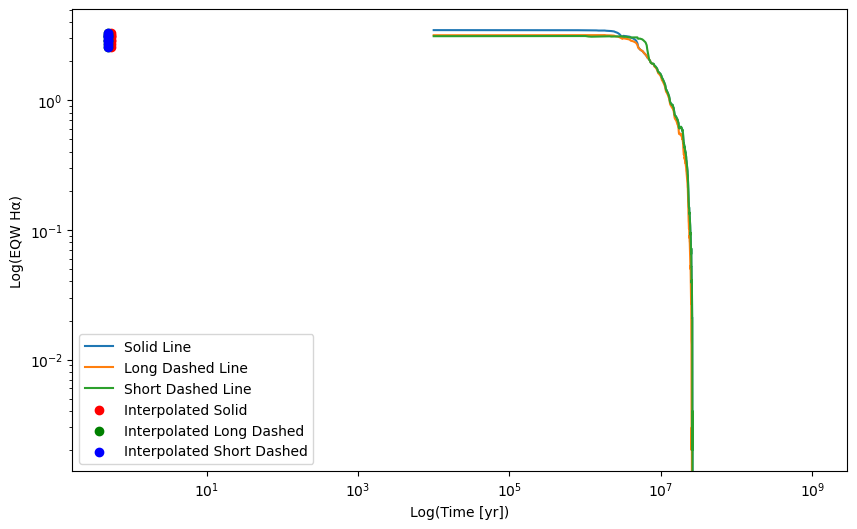

In [14]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Paso 1: Cargar los datos de StarBurst99 sin nombres de columnas
starburst_data = pd.read_csv('SB99.dat', delim_whitespace=True, header=None)

# Asignar nombres a las columnas
starburst_data.columns = ['Time', 'Solid', 'LongDashed', 'ShortDashed']

# Paso 2: Crear funciones de interpolación
interpolate_solid = interp1d(starburst_data['Time'], starburst_data['Solid'], kind='linear', fill_value='extrapolate')
interpolate_longdashed = interp1d(starburst_data['Time'], starburst_data['LongDashed'], kind='linear', fill_value='extrapolate')
interpolate_shortdashed = interp1d(starburst_data['Time'], starburst_data['ShortDashed'], kind='linear', fill_value='extrapolate')

# Paso 3: Cargar tus datos de EQW de Hα
eqw_data = pd.read_csv('measurement_emission_lines.tsv', delimiter='\t')
eqw_data = eqw_data.drop(index=[8,9,10,11,12])

# Paso 4: Aplicar la interpolación para obtener las edades
eqw_data['Age_Solid'] = interpolate_solid(eqw_data['H_ALPHA_EQW'])
eqw_data['Age_LongDashed'] = interpolate_longdashed(eqw_data['H_ALPHA_EQW'])
eqw_data['Age_ShortDashed'] = interpolate_shortdashed(eqw_data['H_ALPHA_EQW'])

# Mostrar los resultados
print(eqw_data)

# Opcional: Graficar los datos con ejes en escala logarítmica
plt.figure(figsize=(10, 6))
plt.plot(starburst_data['Time'], starburst_data['Solid'], label='Solid Line')
plt.plot(starburst_data['Time'], starburst_data['LongDashed'], label='Long Dashed Line')
plt.plot(starburst_data['Time'], starburst_data['ShortDashed'], label='Short Dashed Line')
plt.scatter(np.log10(eqw_data['Age_Solid']), np.log10(eqw_data['H_ALPHA_EQW']), color='red', label='Interpolated Solid')
plt.scatter(np.log10(eqw_data['Age_LongDashed']), np.log10(eqw_data['H_ALPHA_EQW']), color='green', label='Interpolated Long Dashed')
plt.scatter(np.log10(eqw_data['Age_ShortDashed']), np.log10(eqw_data['H_ALPHA_EQW']), color='blue', label='Interpolated Short Dashed')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Log(Time [yr])')
plt.ylabel('Log(EQW Hα)')
plt.legend()
plt.show()


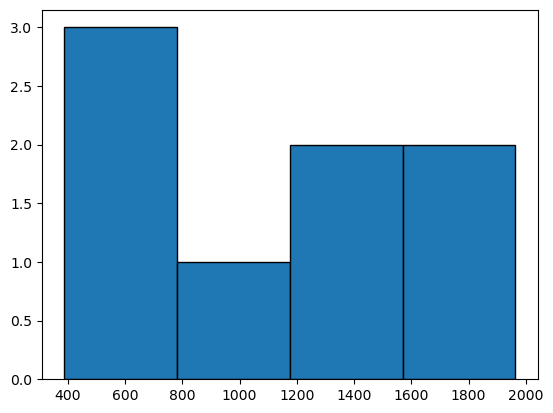

In [25]:
plt.figure()
plt.hist(eqw_data['H_ALPHA_EQW'].tolist(), bins='auto', edgecolor='black')
plt.show()

/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_65154/1501320391.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  starburst_data = pd.read_csv('SB99.dat', delim_whitespace=True, header=None)


   ID  ID_MASK  H_BETA_FLUX  H_BETA_FLUX_ERR  OIII_5007_FLUX  \
0   1      1.0    88.649703         2.494409      491.180987   
1   3      3.0    17.124042         0.715287       85.307068   
2   7     11.0    13.285319         0.569428       39.242761   
3   9     13.0    31.443495         0.851705      136.057021   
4  11     15.0    47.815526         1.320968      126.005902   
5  17     21.0    11.200002         0.338545       29.903199   
6  19     23.0     7.826941         0.425261       33.937198   
7  21     25.0     9.668545         0.342895       16.502650   

   OIII_5007_FLUX_ERR  H_ALPHA_FLUX  H_ALPHA_FLUX_ERR  NII_6584_FLUX  \
0           18.179230    280.129860          2.023057       7.743517   
1            4.093336     49.981168          0.499074       1.743826   
2            1.641625     41.935169          0.387233       2.737472   
3            4.998214     90.248278          1.855688       3.666542   
4            3.462590    154.922381          3.912832       8.3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


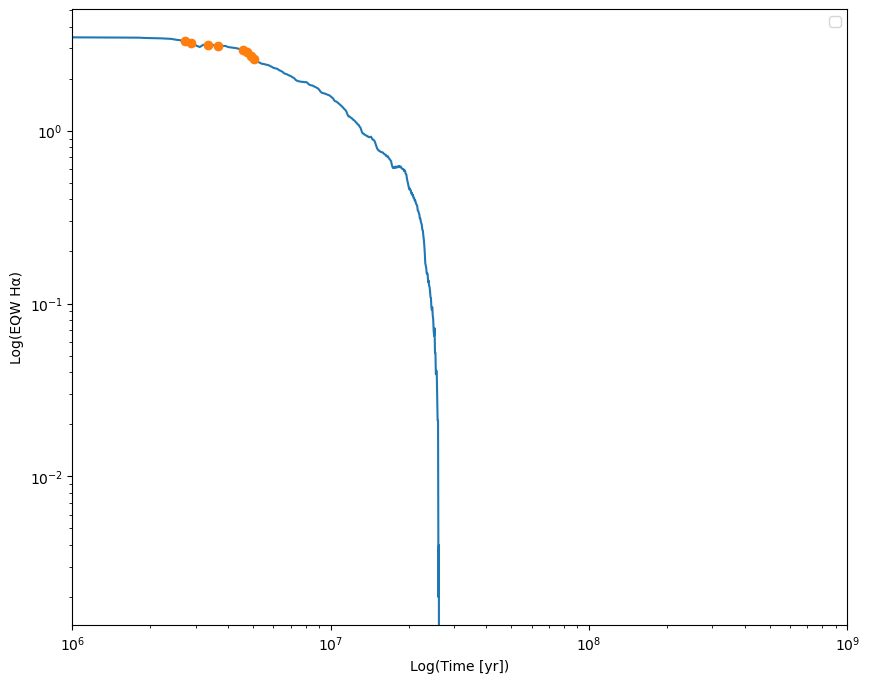

In [33]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Cargar los datos de StarBurst99 sin nombres de columnas
starburst_data = pd.read_csv('SB99.dat', delim_whitespace=True, header=None)

# Asignar nombres a las columnas
starburst_data.columns = ['Time', 'Solid', 'LongDashed', 'ShortDashed']
interpolate_solid = interp1d(starburst_data['Solid'], starburst_data['Time'], fill_value='extrapolate')

eqw_data = pd.read_csv('measurement_emission_lines.tsv', delimiter='\t')
eqw_data = eqw_data.drop(index=[8,9,10,11,12])

eqw_data['Age_Solid'] = interpolate_solid(np.log10(eqw_data['H_ALPHA_EQW'].tolist()))
print(eqw_data)

plt.figure(figsize=(10, 8))

plt.plot(starburst_data['Time'], starburst_data['Solid'], '-', (eqw_data['Age_Solid']), np.log10(eqw_data['H_ALPHA_EQW']), 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlim(10**6,10**9)
plt.xlabel('Log(Time [yr])')
plt.ylabel('Log(EQW Hα)')
plt.legend()
plt.show()

<>:39: SyntaxWarning: invalid escape sequence '\o'
<>:39: SyntaxWarning: invalid escape sequence '\o'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2623/1056691265.py:39: SyntaxWarning: invalid escape sequence '\o'
  plt.title('Edades para IMF Salpeter $\\alpha$ = 2.35 y $M_{up}$=100 $M_{\odot}$')
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2623/1056691265.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  starburst_data = pd.read_csv('SB99.dat', delim_whitespace=True, header=None)


0    2.729769e+06
1    3.336274e+06
2    4.743825e+06
3    2.872207e+06
4    3.658933e+06
5    4.568526e+06
6    4.931174e+06
7    5.026674e+06
Name: Age_Solid, dtype: float64


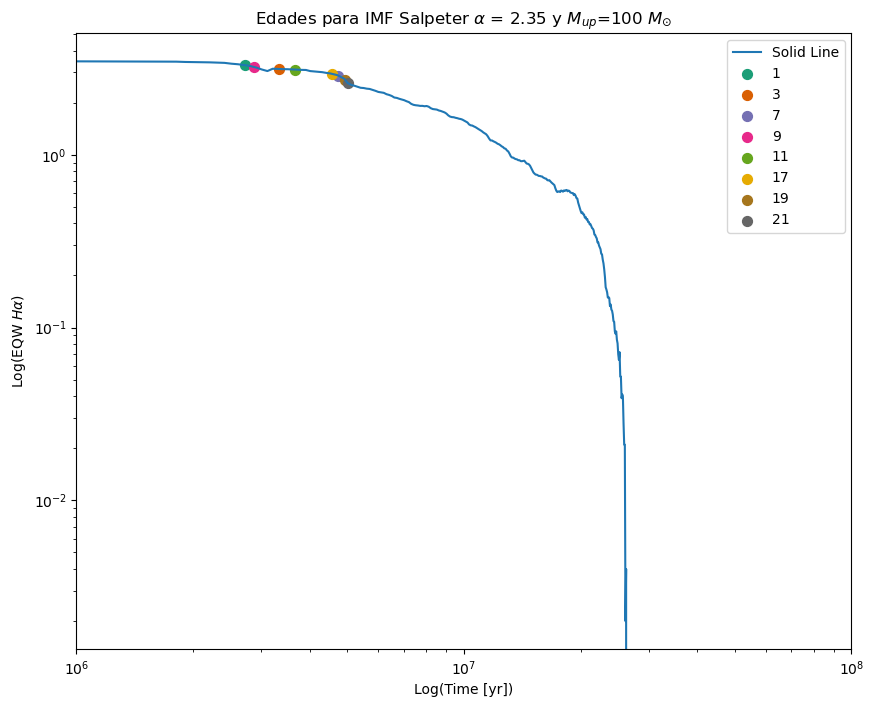

In [8]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Cargar los datos de StarBurst99 sin nombres de columnas
starburst_data = pd.read_csv('SB99.dat', delim_whitespace=True, header=None)

# Asignar nombres a las columnas
starburst_data.columns = ['Time', 'Solid', 'LongDashed', 'ShortDashed']
interpolate_solid = interp1d(starburst_data['Solid'], starburst_data['Time'], fill_value='extrapolate')

eqw_data = pd.read_csv('measurement_emission_lines.tsv', delimiter='\t')
eqw_data = eqw_data.drop(index=[8,9,10,11,12])

eqw_data['Age_Solid'] = interpolate_solid(np.log10(eqw_data['H_ALPHA_EQW'].tolist()))
print(eqw_data['Age_Solid'])

# Obtener una paleta de colores con 8 colores diferentes
palette = sns.color_palette("Dark2", n_colors=8)
color_map = {id: color for id, color in zip(eqw_data['ID'].unique(), palette)}

plt.figure(figsize=(10, 8))

# Graficar los datos de StarBurst99
plt.plot(starburst_data['Time'], starburst_data['Solid'], '-', label='Solid Line')

# Graficar los puntos con diferentes colores según el ID
for id in eqw_data['ID'].unique():
    subset = eqw_data[eqw_data['ID'] == id]
    plt.scatter(subset['Age_Solid'], np.log10(subset['H_ALPHA_EQW']), color=color_map[id], label=f'{id}', s=50)

plt.xscale('log')
plt.yscale('log')
plt.xlim(10**6,10**8)
plt.xlabel('Log(Time [yr])')
plt.ylabel('Log(EQW $H\\alpha$)')
plt.title('Edades para IMF Salpeter $\\alpha$ = 2.35 y $M_{up}$=100 $M_{\odot}$')
plt.legend()
plt.show()


<>:39: SyntaxWarning: invalid escape sequence '\o'
<>:39: SyntaxWarning: invalid escape sequence '\o'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2623/967624807.py:39: SyntaxWarning: invalid escape sequence '\o'
  plt.title('Edades para IMF Salpeter $\\alpha$ = 2.35 y $M_{up}$=100 $M_{\odot}$')
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2623/967624807.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  starburst_data = pd.read_csv('SB99.dat', delim_whitespace=True, header=None)


0    2.729769e+06
1    3.336274e+06
2    4.743825e+06
3    2.872207e+06
4    3.658933e+06
5    4.568526e+06
6    4.931174e+06
7    5.026674e+06
Name: Age_Solid, dtype: float64


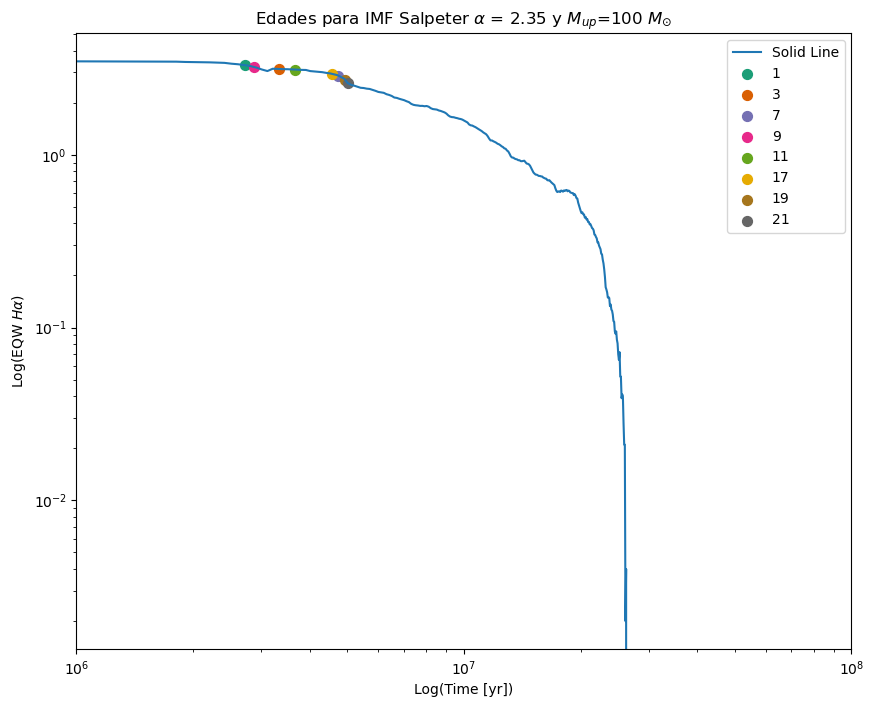

In [9]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Cargar los datos de StarBurst99 sin nombres de columnas
starburst_data = pd.read_csv('SB99.dat', delim_whitespace=True, header=None)

# Asignar nombres a las columnas
starburst_data.columns = ['Time', 'Solid', 'LongDashed', 'ShortDashed']
interpolate_solid = interp1d(starburst_data['Solid'], starburst_data['Time'])

eqw_data = pd.read_csv('measurement_emission_lines.tsv', delimiter='\t')
eqw_data = eqw_data.drop(index=[8,9,10,11,12])

eqw_data['Age_Solid'] = interpolate_solid(np.log10(eqw_data['H_ALPHA_EQW'].tolist()))
print(eqw_data['Age_Solid'])

# Obtener una paleta de colores con 8 colores diferentes
palette = sns.color_palette("Dark2", n_colors=8)
color_map = {id: color for id, color in zip(eqw_data['ID'].unique(), palette)}

plt.figure(figsize=(10, 8))

# Graficar los datos de StarBurst99
plt.plot(starburst_data['Time'], starburst_data['Solid'], '-', label='Solid Line')

# Graficar los puntos con diferentes colores según el ID
for id in eqw_data['ID'].unique():
    subset = eqw_data[eqw_data['ID'] == id]
    plt.scatter(subset['Age_Solid'], np.log10(subset['H_ALPHA_EQW']), color=color_map[id], label=f'{id}', s=50)

plt.xscale('log')
plt.yscale('log')
plt.xlim(10**6,10**8)
plt.xlabel('Log(Time [yr])')
plt.ylabel('Log(EQW $H\\alpha$)')
plt.title('Edades para IMF Salpeter $\\alpha$ = 2.35 y $M_{up}$=100 $M_{\odot}$')
plt.legend()
plt.show()


<>:38: SyntaxWarning: invalid escape sequence '\o'
<>:38: SyntaxWarning: invalid escape sequence '\o'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2623/1905873564.py:38: SyntaxWarning: invalid escape sequence '\o'
  plt.title('Edades para IMF $\\alpha$ = 3.30 y $M_{up}$=100 $M_{\odot}$')
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2623/1905873564.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  starburst_data = pd.read_csv('SB99.dat', delim_whitespace=True, header=None)


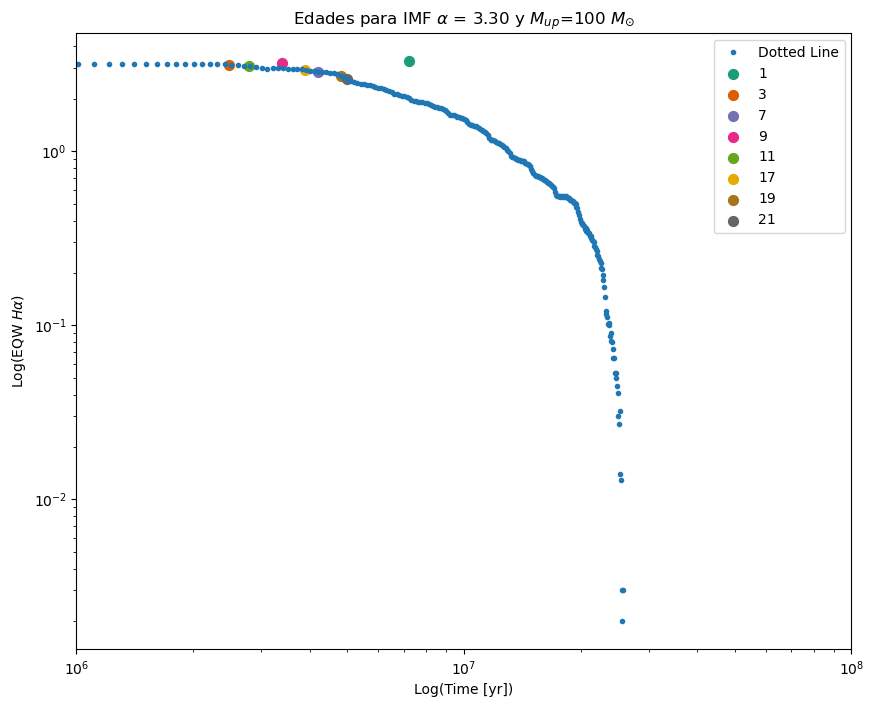

In [13]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Cargar los datos de StarBurst99 sin nombres de columnas
starburst_data = pd.read_csv('SB99.dat', delim_whitespace=True, header=None)

# Asignar nombres a las columnas
starburst_data.columns = ['Time', 'Solid', 'LongDashed', 'ShortDashed']
interpolate_solid = interp1d(starburst_data['LongDashed'], starburst_data['Time'], fill_value='extrapolate')

eqw_data = pd.read_csv('measurement_emission_lines.tsv', delimiter='\t')
eqw_data = eqw_data.drop(index=[8,9,10,11,12])

eqw_data['Age_LongDashed'] = interpolate_solid(np.log10(eqw_data['H_ALPHA_EQW'].tolist()))

# Obtener una paleta de colores con 8 colores diferentes
palette = sns.color_palette("Dark2", n_colors=8)
color_map = {id: color for id, color in zip(eqw_data['ID'].unique(), palette)}

plt.figure(figsize=(10, 8))

# Graficar los datos de StarBurst99
plt.plot(starburst_data['Time'], starburst_data['LongDashed'], '.', label='Dotted Line')

# Graficar los puntos con diferentes colores según el ID
for id in eqw_data['ID'].unique():
    subset = eqw_data[eqw_data['ID'] == id]
    plt.scatter(subset['Age_LongDashed'], np.log10(subset['H_ALPHA_EQW']), color=color_map[id], label=f'{id}', s=50)

plt.xscale('log')
plt.yscale('log')
plt.xlim(10**6,10**8)
plt.xlabel('Log(Time [yr])')
plt.ylabel('Log(EQW $H\\alpha$)')
plt.title('Edades para IMF $\\alpha$ = 3.30 y $M_{up}$=100 $M_{\odot}$')
plt.legend()
plt.show()

<>:38: SyntaxWarning: invalid escape sequence '\o'
<>:38: SyntaxWarning: invalid escape sequence '\o'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2623/3855596296.py:38: SyntaxWarning: invalid escape sequence '\o'
  plt.title('Edades para IMF Salpeter $\\alpha$ = 2.35 y $M_{up}$=30 $M_{\odot}$')
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2623/3855596296.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  starburst_data = pd.read_csv('SB99.dat', delim_whitespace=True, header=None)


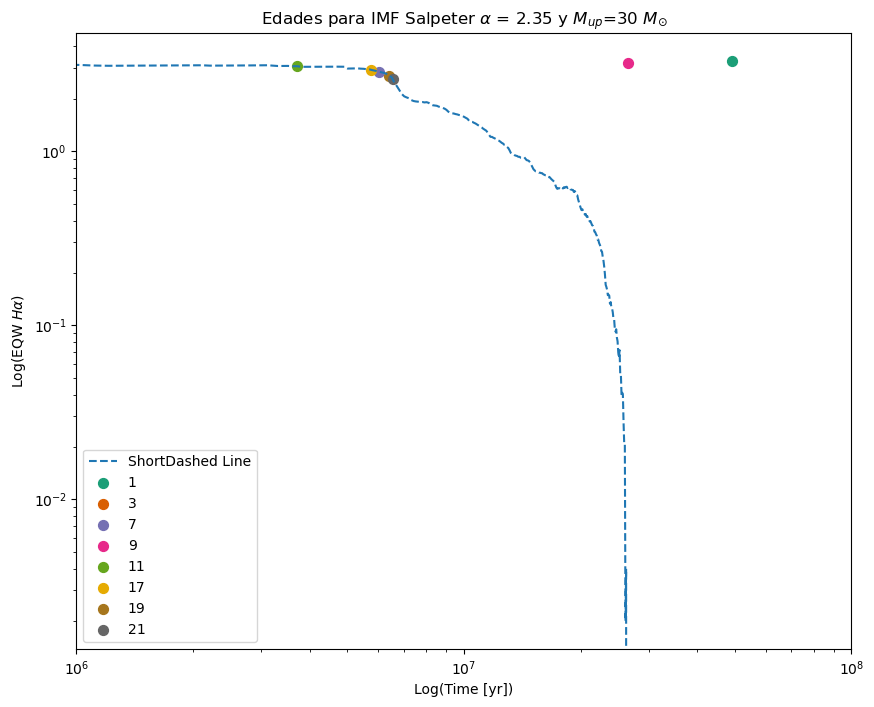

In [12]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Cargar los datos de StarBurst99 sin nombres de columnas
starburst_data = pd.read_csv('SB99.dat', delim_whitespace=True, header=None)

# Asignar nombres a las columnas
starburst_data.columns = ['Time', 'Solid', 'LongDashed', 'ShortDashed']
interpolate_solid = interp1d(starburst_data['ShortDashed'], starburst_data['Time'], fill_value='extrapolate')

eqw_data = pd.read_csv('measurement_emission_lines.tsv', delimiter='\t')
eqw_data = eqw_data.drop(index=[8,9,10,11,12])

eqw_data['Age_ShortDashed'] = interpolate_solid(np.log10(eqw_data['H_ALPHA_EQW'].tolist()))

# Obtener una paleta de colores con 8 colores diferentes
palette = sns.color_palette("Dark2", n_colors=8)
color_map = {id: color for id, color in zip(eqw_data['ID'].unique(), palette)}

plt.figure(figsize=(10, 8))

# Graficar los datos de StarBurst99
plt.plot(starburst_data['Time'], starburst_data['ShortDashed'], '--', label='ShortDashed Line')

# Graficar los puntos con diferentes colores según el ID
for id in eqw_data['ID'].unique():
    subset = eqw_data[eqw_data['ID'] == id]
    plt.scatter(subset['Age_ShortDashed'], np.log10(subset['H_ALPHA_EQW']), color=color_map[id], label=f'{id}', s=50)

plt.xscale('log')
plt.yscale('log')
plt.xlim(10**6,10**8)
plt.xlabel('Log(Time [yr])')
plt.ylabel('Log(EQW $H\\alpha$)')
plt.title('Edades para IMF Salpeter $\\alpha$ = 2.35 y $M_{up}$=30 $M_{\odot}$')
plt.legend()
plt.show()

In [14]:
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

# Parámetros cosmológicos
H0 = 67.8  # Constante de Hubble en km/s/Mpc, de NED
Om0 = 0.308  # Densidad de materia en el universo plano (puedes ajustar según lo necesario)
cosmo = FlatLambdaCDM(H0=H0, Om0=Om0)

# Redshift de la galaxia
z = 0.001568

# Calcular la distancia de luminosidad en Mpc
D = cosmo.angular_diameter_distance(z).value  # en Mpc

# Distancia angular en arcsec
# para las regiones SF observadas (de ds9)
theta_arcsec_1 = 70.135
theta_arcsec_3 = 77.639
theta_arcsec_5 = 80.253 #79.437 (cuando pongo línea al inicio de la SF region, si la pongo en la max intensidad de Ha entonces 80)
theta_arcsec_7 = 44.245
theta_arcsec_9 = 73.598
theta_arcsec_11 = 82.945
theta_arcsec_13 = 132.034
theta_arcsec_15 = 16.404
theta_arcsec_17 = 152.517
theta_arcsec_19 = 95.697
theta_arcsec_21 = 68.644
theta_arcsec_23 = 53.192

# Convertir arcsec a radianes
theta_rad_1 = theta_arcsec_1 * u.arcsec.to(u.radian)
theta_rad_3 = theta_arcsec_3 * u.arcsec.to(u.radian)
theta_rad_5 = theta_arcsec_5 * u.arcsec.to(u.radian)
theta_rad_7 = theta_arcsec_7 * u.arcsec.to(u.radian)
theta_rad_9 = theta_arcsec_9 * u.arcsec.to(u.radian)
theta_rad_11 = theta_arcsec_11 * u.arcsec.to(u.radian)
theta_rad_13 = theta_arcsec_13 * u.arcsec.to(u.radian)
theta_rad_15 = theta_arcsec_15 * u.arcsec.to(u.radian)
theta_rad_17 = theta_arcsec_17 * u.arcsec.to(u.radian)
theta_rad_19 = theta_arcsec_19 * u.arcsec.to(u.radian)
theta_rad_21 = theta_arcsec_21 * u.arcsec.to(u.radian)
theta_rad_23 = theta_arcsec_23 * u.arcsec.to(u.radian)

# Calcular la distancia física en kpc
d_kpc_1 = D * theta_rad_1 * 1000  # Convertir Mpc a kpc
d_kpc_3 = D * theta_rad_3 * 1000
d_kpc_5 = D * theta_rad_5 * 1000
d_kpc_7 = D * theta_rad_7 * 1000
d_kpc_9 = D * theta_rad_9 * 1000
d_kpc_11 = D * theta_rad_11 * 1000
d_kpc_13 = D * theta_rad_13 * 1000
d_kpc_15 = D * theta_rad_15 * 1000
d_kpc_17 = D * theta_rad_17 * 1000
d_kpc_19 = D * theta_rad_19 * 1000
d_kpc_21 = D * theta_rad_21 * 1000
d_kpc_23 = D * theta_rad_23 * 1000

print(f"Distancia física desde slit 1 al centro de NGC1313: {d_kpc_1:.3f} kpc")
print(f"Distancia física desde slit 3 al centro de NGC1313: {d_kpc_3:.3f} kpc")
print(f"Distancia física desde slit 5 al centro de NGC1313: {d_kpc_5:.3f} kpc")
print(f"Distancia física desde slit 7 al centro de NGC1313: {d_kpc_7:.3f} kpc")
print(f"Distancia física desde slit 9 al centro de NGC1313: {d_kpc_9:.3f} kpc")
print(f"Distancia física desde slit 11 al centro de NGC1313: {d_kpc_11:.3f} kpc")
print(f"Distancia física desde slit 13 al centro de NGC1313: {d_kpc_13:.3f} kpc")
print(f"Distancia física desde slit 15 al centro de NGC1313: {d_kpc_15:.3f} kpc")
print(f"Distancia física desde slit 17 al centro de NGC1313: {d_kpc_17:.3f} kpc")
print(f"Distancia física desde slit 19 al centro de NGC1313: {d_kpc_19:.3f} kpc")
print(f"Distancia física desde slit 21 al centro de NGC1313: {d_kpc_21:.3f} kpc")
print(f"Distancia física desde slit 23 al centro de NGC1313: {d_kpc_23:.3f} kpc")


Distancia física desde slit 1 al centro de NGC1313: 2.353 kpc
Distancia física desde slit 3 al centro de NGC1313: 2.605 kpc
Distancia física desde slit 5 al centro de NGC1313: 2.692 kpc
Distancia física desde slit 7 al centro de NGC1313: 1.484 kpc
Distancia física desde slit 9 al centro de NGC1313: 2.469 kpc
Distancia física desde slit 11 al centro de NGC1313: 2.783 kpc
Distancia física desde slit 13 al centro de NGC1313: 4.430 kpc
Distancia física desde slit 15 al centro de NGC1313: 0.550 kpc
Distancia física desde slit 17 al centro de NGC1313: 5.117 kpc
Distancia física desde slit 19 al centro de NGC1313: 3.210 kpc
Distancia física desde slit 21 al centro de NGC1313: 2.303 kpc
Distancia física desde slit 23 al centro de NGC1313: 1.785 kpc


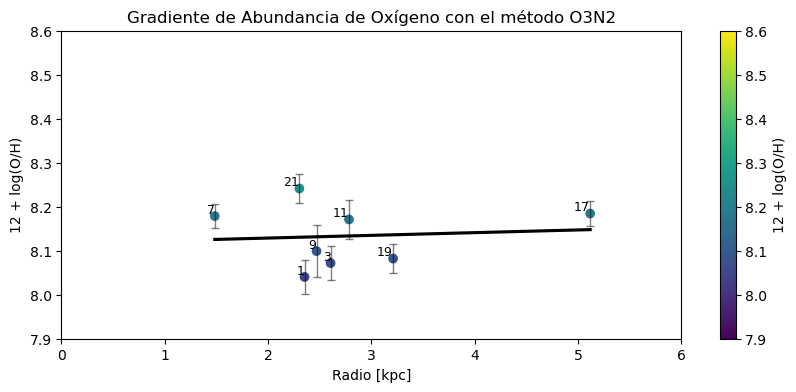

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv('gradiente.tsv', delimiter='\t')
df

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_O3N2'], yerr=df['12_LOG_OH_O3N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)
#plt.errorbar(df['r_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'], fmt='o', color='red', capsize=5, label='N2 Error')


# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_O3N2'], c=df['12_LOG_OH_O3N2'], cmap='viridis', vmin=7.9, vmax=8.6)


# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)')

sns.regplot(x='r_kpc', y='12_LOG_OH_O3N2', data=df, scatter=False, ci=None, color='black', line_kws={'label':"y={0:.2f}x+{1:.2f}".format(*np.polyfit(df['r_kpc'], df['12_LOG_OH_O3N2'], 1))})

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_O3N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]')
plt.ylabel('12 + log(O/H)')
plt.title('Gradiente de Abundancia de Oxígeno con el método O3N2')
plt.xlim(0,6)
plt.ylim(7.9,8.6)
# Mostrar la gráfica
plt.show()



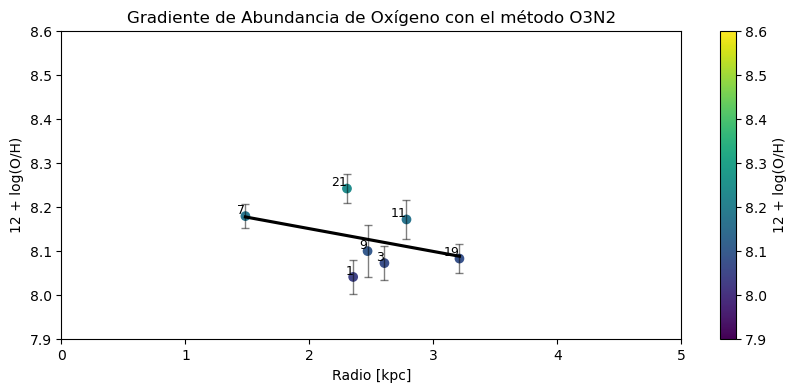

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv('gradiente.tsv', delimiter='\t')
df = df.drop(index=[5])
df

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_O3N2'], yerr=df['12_LOG_OH_O3N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)
#plt.errorbar(df['r_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'], fmt='o', color='red', capsize=5, label='N2 Error')


# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_O3N2'], c=df['12_LOG_OH_O3N2'], cmap='viridis', vmin=7.9, vmax=8.6)


# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)')

sns.regplot(x='r_kpc', y='12_LOG_OH_O3N2', data=df, scatter=False, ci=None,color='black', line_kws={'label':"y={0:.2f}x+{1:.2f}".format(*np.polyfit(df['r_kpc'], df['12_LOG_OH_O3N2'], 1))})

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_O3N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]')
plt.ylabel('12 + log(O/H)')
plt.title('Gradiente de Abundancia de Oxígeno con el método O3N2')
plt.xlim(0,5)
plt.ylim(7.9,8.6)
# Mostrar la gráfica
plt.show()



   ID      O3N2  O3N2_ERR  12_LOG_OH_O3N2  12_LOG_OH_O3N2_ERR        N2  \
0   1  2.301985  0.112996        8.040375            0.038624 -1.558421   
1   3  2.154682  0.126795        8.071898            0.039355 -1.457303   
2   7  1.655616  0.063629        8.178698            0.026910 -1.185229   
3   9  2.027372  0.247328        8.099142            0.059475 -1.391182   
4  11  1.691130  0.173196        8.171098            0.043927 -1.270309   
5  17  1.628656  0.074348        8.184468            0.027912 -1.202156   
6  19  2.106784  0.080028        8.082148            0.032809 -1.469700   
7  21  1.362967  0.120515        8.241325            0.032812 -1.130775   

     N2_ERR  12_LOG_OH_N2  12_LOG_OH_N2_ERR  r_kpc  
0  0.111177      8.023009          0.069037  2.353  
1  0.123748      8.069726          0.072256  2.605  
2  0.058070      8.195424          0.047517  1.484  
3  0.246533      8.100274          0.121723  2.469  
4  0.172368      8.156117          0.089443  2.783  
5  0.0

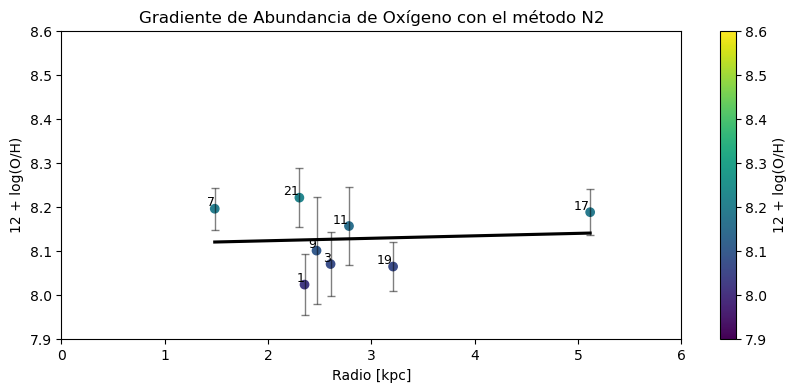

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('gradiente.tsv', delimiter='\t')

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)
#plt.errorbar(df['r_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'], fmt='o', color='red', capsize=5, label='N2 Error')


# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_N2'], c=df['12_LOG_OH_N2'], cmap='viridis', vmin=7.9, vmax=8.6)


# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)')

sns.regplot(x='r_kpc', y='12_LOG_OH_N2', data=df, scatter=False, ci=None, color='black', line_kws={'label':"y={0:.2f}x+{1:.2f}".format(*np.polyfit(df['r_kpc'], df['12_LOG_OH_N2'], 1))})

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]')
plt.ylabel('12 + log(O/H)')
plt.title('Gradiente de Abundancia de Oxígeno con el método N2')
plt.xlim(0,6)
plt.ylim(7.9,8.6)
# Mostrar la gráfica
plt.show()



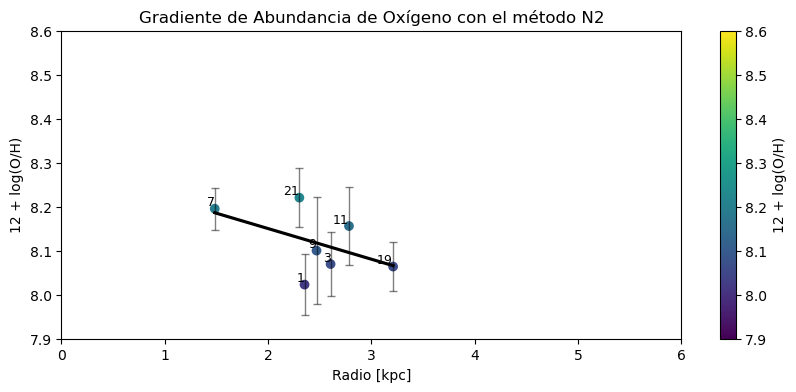

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('gradiente.tsv', delimiter='\t')
df = df.drop(index=[5])

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)
#plt.errorbar(df['r_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'], fmt='o', color='red', capsize=5, label='N2 Error')


# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_N2'], c=df['12_LOG_OH_N2'], cmap='viridis', vmin=7.9, vmax=8.6)


# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)')

sns.regplot(x='r_kpc', y='12_LOG_OH_N2', data=df, scatter=False, ci=None, color='black', line_kws={'label':"y={0:.2f}x+{1:.2f}".format(*np.polyfit(df['r_kpc'], df['12_LOG_OH_N2'], 1))})

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]')
plt.ylabel('12 + log(O/H)')
plt.title('Gradiente de Abundancia de Oxígeno con el método N2')
plt.xlim(0,6)
plt.ylim(7.9,8.6)
# Mostrar la gráfica
plt.show()



SFR

Kennicutt 1998 


$SFR (M\odot year^{-1})$ = 7.9 $\times$ $10^{-42}$ $L(H\alpha)$ (ergs $s^{-1}$)

F = $\left(\dfrac{L}{4 \pi d^2}\right)$

con d en cm

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('txt/measurement_emission_lines.tsv', delimiter='\t')
df = df.drop(index=[8,9,10,11,12])

# La distancia en Mpc
distance_mpc = 4.1

# Constantes
distance_cm = distance_mpc * 3.086e24  # Convertir Mpc a cm
kenn_ratio = 7.9e-42  # Kennicutt 98 ratio en M_sun/yr/(erg/s)

# Calcular la luminosidad L en erg/s
df['L_H_ALPHA'] = df['H_ALPHA_FLUX'] * 4 * np.pi * distance_cm**2

# Calcular la SFR usando Kennicutt 98
df['SFR'] = df['L_H_ALPHA'] * kenn_ratio

# Mostrar el resultado
print(df)


   ID  ID_MASK  H_BETA_FLUX  H_BETA_FLUX_ERR  OIII_5007_FLUX  \
0   1      1.0    88.649703         2.494409      491.180987   
1   3      3.0    17.124042         0.715287       85.307068   
2   7     11.0    13.285319         0.569428       39.242761   
3   9     13.0    31.443495         0.851705      136.057021   
4  11     15.0    47.815526         1.320968      126.005902   
5  17     21.0    11.200002         0.338545       29.903199   
6  19     23.0     7.826941         0.425261       33.937198   
7  21     25.0     9.668545         0.342895       16.502650   

   OIII_5007_FLUX_ERR  H_ALPHA_FLUX  H_ALPHA_FLUX_ERR  NII_6584_FLUX  \
0           18.179230    280.129860          2.023057       7.743517   
1            4.093336     49.981168          0.499074       1.743826   
2            1.641625     41.935169          0.387233       2.737472   
3            4.998214     90.248278          1.855688       3.666542   
4            3.462590    154.922381          3.912832       8.3

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('txt/measurement_emission_lines.tsv', delimiter='\t')
df = df.drop(index=[8,9,10,11,12])

# La distancia en Mpc
distance_mpc = 4.1

# Constantes
distance_cm = distance_mpc * 3.086e24  # Convertir Mpc a cm
 # Kennicutt 98 ratio en M_sun/yr/(erg/s)

# Calcular la luminosidad L en erg/s
df['L_H_ALPHA'] = df['H_ALPHA_FLUX'] * 4 * np.pi * distance_cm**2

# Calcular la SFR usando Kennicutt 98
df['SFR'] = df['L_H_ALPHA'] * 7.9 * 10**(-42)

# Mostrar el resultado
print(df)


   ID  ID_MASK  H_BETA_FLUX  H_BETA_FLUX_ERR  OIII_5007_FLUX  \
0   1      1.0    88.649703         2.494409      491.180987   
1   3      3.0    17.124042         0.715287       85.307068   
2   7     11.0    13.285319         0.569428       39.242761   
3   9     13.0    31.443495         0.851705      136.057021   
4  11     15.0    47.815526         1.320968      126.005902   
5  17     21.0    11.200002         0.338545       29.903199   
6  19     23.0     7.826941         0.425261       33.937198   
7  21     25.0     9.668545         0.342895       16.502650   

   OIII_5007_FLUX_ERR  H_ALPHA_FLUX  H_ALPHA_FLUX_ERR  NII_6584_FLUX  \
0           18.179230    280.129860          2.023057       7.743517   
1            4.093336     49.981168          0.499074       1.743826   
2            1.641625     41.935169          0.387233       2.737472   
3            4.998214     90.248278          1.855688       3.666542   
4            3.462590    154.922381          3.912832       8.3